In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
def diff_diffusion(r=0.45,theta=0.75):
    # initital extra parameter
    domainl = 2.     # from -1 to 1
    gridn   = 41 + 2 # 40 cells; 41 points; 42 for python(0-42 number)
    gridt   = 2000    #
    cres    = np.zeros([gridn,gridt+10])   # c 1 - 41  ; c[0] c[42] ghost point
    D       = 0.1
    # r       = 0.45 # D * delta t / delta x ^2
    dx      = domainl / (gridn-2-1)
    dt      = r * dx**2/D
    dx      = domainl / (gridn-2-1)
    dt      = r * dx**2/D
    x       = np.empty(gridn)           # x 1 - 41  ; x[0] x[42] ghost point
    x[1:gridn-1] = np.linspace(-1,1,gridn-2)
    x[0] = np.nan
    x[-1] = np.nan
    print("initial theta = ",theta)
    print("initial r = ",r," dt = ",dt,"dx = ",dx)
    # initial c
    ind_cres      = (x>-0.3)&(x<0.3)
    cres[ind_cres,0] = 1.
    N = gridn
    # initial banded matrix as three separate 1D vectors
    #   record number is row number of a , b , c , d
    row_a, row_b, row_c, row_d,ff = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N),np.zeros(N)

    # count,dealing with every time step: cres[jx,nt] 
    for nt in range(0,gridt):
        # reset coeff
        row_a[:] = r*theta
        row_b[:] = -1*(2*r*theta+1)
        row_c[:] = r*theta

        
        # row_a[1] = -1*(2*r*theta+1)
        # row_b[1] = r*theta
        # B.C.
        # solving tridiagonal
        row_d[0]=0.
        row_d[42]=0.
        for j in range(2,gridn-2): # 2 - 40
            row_d[j] = r*(theta-1)*cres[j+1,nt] - (2*r*theta-2*r+1)*cres[j,nt] + r*(theta-1)*cres[j-1,nt]
        cres[0,nt]  = cres[2,nt]
        cres[42,nt] = cres[40,nt]
        # ghost point
        # print(row_d)
        # 1,41 单独计算
        row_c[1]   = 2*r*theta
        row_a[N-2] = 2*r*theta
        row_d[1] = r*(theta-1)*cres[1+1,nt] - (2*r*theta-2*r+1)*cres[1,nt] + r*(theta-1)*cres[1-1,nt] + r*theta*row_d[0]
        row_d[gridn-2] = r*(theta-1)*cres[gridn-2+1,nt] - (2*r*theta-2*r+1)*cres[gridn-2,nt] + r*(theta-1)*cres[gridn-2-1,nt] + r*theta*row_d[42]

        # thomas
        for i in range(2,gridn-1): # 2 - 41
            row_b[i] = row_b[i] - row_a[i]*row_c[i-1]/row_b[i-1]
            row_d[i] = row_d[i] - row_a[i]*row_d[i-1]/row_b[i-1]
        # count ff[41] and traceback ff[1-40]
        ff[gridn-2] = row_d[gridn-2] / row_b[gridn-2]

        for i in range(gridn-3,0,-1): # 40 - 1
            ff[i] = (row_d[i]-row_c[i]*ff[i+1])/row_b[i]
        # add one time step
        cres[:, nt+1] = ff
    return cres

In [3]:
# initital extra parameter

domainl = 2.     # from -1 to 1
gridn   = 41 + 2 # 40 cells; 41 points; 42 for python(0-42 number)
gridt   = 100    #
cres    = np.zeros([gridn,gridt+10])   # c 1 - 41  ; c[0] c[42] ghost point
D       = 0.1
r       = 0.45 # D * delta t / delta x ^2
dx      = domainl / (gridn-2-1)
dt      = r * dx**2/D
dx      = domainl / (gridn-2-1)
dt      = r * dx**2/D
x       = np.empty(gridn)           # x 1 - 41  ; x[0] x[42] ghost point
x[1:gridn-1] = np.linspace(-1,1,gridn-2)
x[0] = np.nan
x[-1] = np.nan
cres_theta05 = diff_diffusion(r=r,theta=0.5)
cres_theta075 = diff_diffusion(r=r,theta=0.75)
cres_diff = cres_theta05 - cres_theta075

initial theta =  0.5
initial r =  0.45  dt =  0.011250000000000003 dx =  0.05


/HGST_SATA_8T_3/yycheng/miniconda3/envs/from_WSL/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
/HGST_SATA_8T_3/yycheng/miniconda3/envs/from_WSL/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less


initial theta =  0.75
initial r =  0.45  dt =  0.011250000000000003 dx =  0.05


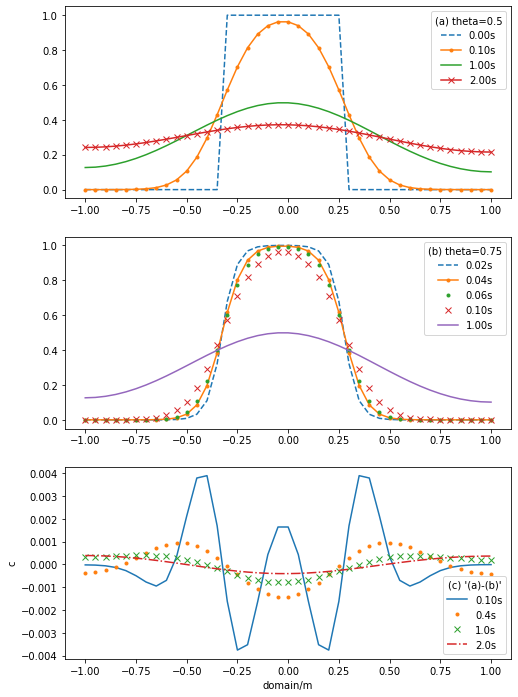

In [4]:

fig,ax = plt.subplots(3,figsize=(8,12))

# ax.plot(x[1:gridn-1], cres_theta05[1:42,0],'.-', label='0s')

ax[0].plot(x[1:gridn-1], cres_theta05[1:42,int(np.rint(0./dt))],'--', label='0.00s')
ax[0].plot(x[1:gridn-1], cres_theta05[1:42,int(np.rint(0.1/dt))],'.-', label='0.10s')
# ax[0].plot(x[1:gridn-1], cres_theta05[1:42,int(np.rint(0.06/dt))],'.', label='0.06s')
ax[0].plot(x[1:gridn-1], cres_theta05[1:42,int(np.rint(1.0/dt))],'-', label='1.00s')
ax[0].plot(x[1:gridn-1], cres_theta05[1:42,int(np.rint(2.0/dt))],'x-', label='2.00s')

ax[1].plot(x[1:gridn-1], cres_theta075[1:42,int(np.rint(0.02/dt))],'--', label='0.02s')
ax[1].plot(x[1:gridn-1], cres_theta075[1:42,int(np.rint(0.04/dt))],'.-', label='0.04s')
ax[1].plot(x[1:gridn-1], cres_theta075[1:42,int(np.rint(0.06/dt))],'.', label='0.06s')
ax[1].plot(x[1:gridn-1], cres_theta075[1:42,int(np.rint(0.1/dt))],'x', label='0.10s')
ax[1].plot(x[1:gridn-1], cres_theta075[1:42,int(np.rint(1.0/dt))],'-', label='1.00s')

# ax.plot(x[1:gridn-1], cres_theta05[1:42,int(np.rint(0.05/dt))],'--', label='0.1s')
# ax.plot(x[1:gridn-1], cres_theta05[1:42,int(np.rint(1./dt))],'-', label='1s')
# ax[2].plot(x[1:gridn-1], cres_diff[1:42,int(np.rint(0.02/dt))],'.-', label='0.02s')
# ax[2].plot(x[1:gridn-1], cres_diff[1:42,int(np.rint(0.04/dt))],'--', label='0.04s')
ax[2].plot(x[1:gridn-1], cres_diff[1:42,int(np.rint(0.10/dt))],'-', label='0.10s')
ax[2].plot(x[1:gridn-1], cres_diff[1:42,int(np.rint(0.50/dt))],'.', label='0.4s')
ax[2].plot(x[1:gridn-1], cres_diff[1:42,int(np.rint(1.00/dt))],'x', label='1.0s')
ax[2].plot(x[1:gridn-1], cres_diff[1:42,int(np.rint(2.00/dt))],'-.', label='2.0s')

ax[0].legend(loc='upper right',title='(a) theta=0.5')
ax[1].legend(loc='upper right',title='(b) theta=0.75')
ax[2].legend(loc='lower right',title='(c) \'(a)-(b)\'')
plt.xlabel('domain/m')
plt.ylabel('c')
plt.savefig('./p4t3.png')
    # ax[nn].legend(')